<a href="https://colab.research.google.com/github/Jangerum/AI2020/blob/master/cnn_test_ipvnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np

### data load

### cnn model build

### model evaluated

In [16]:
 def build_model(width, height, channel):  
    model = Sequential()
    
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(width, height, channel)
    ))
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(AveragePooling2D(
        pool_size=(8,8),
        padding='same'
    ))

    model.add(Flatten())
    model.add(Dense(
        units=640,
        activation='relu'
    ))
    model.add(Dense(
        units=10,
        activation='softmax'
    ))

    opt = Adam(learning_rate=0.001)
    model.compile(
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

    return model

In [17]:
def data_preprocessing():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    mean=[0,0,0]
    std=[0,0,0]
    newX_train = np.ones(X_train.shape)
    newX_test = np.ones(X_test.shape)
    #train set에 있는 데이터로만 평균과 표준편차를 구함
    for i in range(3):
        mean[i] = np.mean(X_train[:,:,:,i])
        std[i] = np.std(X_train[:,:,:,i])

    #train과 test셋 모두 정규화 작업    
    for i in range(3):
        newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
        newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
        newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
        newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
            
    X_train = newX_train
    X_test = newX_test

    return (X_train, Y_train), (X_test, Y_test)

In [18]:
#(X_train, Y_train), (X_test, Y_test) = data_preprocessing()
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


model = build_model(X_train.shape[1],X_train.shape[2],X_train.shape[3] )

hist = model.fit(
    X_train, Y_train, 
    batch_size=48, epochs=30, 
    verbose=1, 
    shuffle=True, validation_split=0.05
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/30
990/990 [==============================] - 4s 4ms/step - loss: 1.5763 - accuracy: 0.4191 - val_loss: 1.2698 - val_accuracy: 0.5588
Epoch 2/30
990/990 [==============================] - 4s 4ms/step - loss: 1.1936 - accuracy: 0.5734 - val_loss: 1.0352 - val_accuracy: 0.6404
Epoch 3/30
990/990 [==============================] - 4s 4ms/step - loss: 1.0391 - accuracy: 0.6311 - val_loss: 0.9864 - val_accuracy: 0.6516
Epoch 4/30
990/990 [==============================] - 4s 4ms/step - loss: 0.9437 - accuracy: 0.6665 - val_loss: 0.8769 - val_accuracy: 0.6876
Epoch 5/30
990/990 [==============================] - 4s 4ms/step - loss: 0.8671 - accuracy: 0.6952 - val_loss: 0.8307 - val_accuracy: 0.7132
Epoch 6/30
990/990 [==============================] - 4s 4ms/step - loss: 0.8032 - accuracy: 0.7158 - val_loss: 0.9000 - val_accuracy: 0.6972
Epoch 7/30
990/990 [==============================] - 4s 4ms/step - loss: 0.7555 - accuracy: 0.7339 - val_loss: 0.7795 - val_accuracy: 0.7416
Epoch 

[1.0913456678390503, 0.7310000061988831]

In [19]:
import matplotlib.pyplot as plt

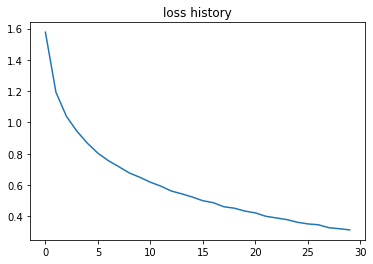

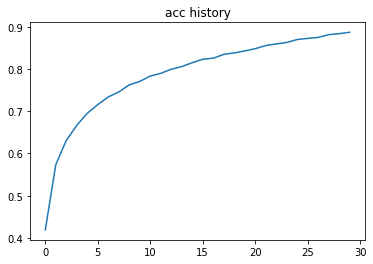

In [20]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()